# KNU 감성사전을 통한 단어의 긍정/부정을 판단하기

In [1]:
# ### KNU 한국어 감성사전 -DI LAB
# - SentiWord info.json 한국어 감성사전 제공

import json
import pandas as pd
from tqdm import tqdm

In [67]:
# a = json.load(open('NZRW1900000001.json'))

In [ ]:
# !python -m pip install Korpora

In [74]:
# from Korpora import Korpora

In [61]:
# !python -m pip install requests

In [62]:
# import requests

In [76]:
# Korpora.corpus_list()

{'aihub_conversation_translation': 'AI Hub 에서 제공하는 번역용 병렬 말뭉치 (대화)',
 'aihub_decree_translation': 'AI Hub 에서 제공하는 번역용 병렬 말뭉치 (조례)',
 'aihub_government_website_translation': 'AI Hub 에서 제공하는 번역용 병렬 말뭉치 (지자체웹사이트)',
 'aihub_korean_culture_translation': 'AI Hub 에서 제공하는 번역용 병렬 말뭉치 (한국문화)',
 'aihub_news_translation': 'AI Hub 에서 제공하는 번역용 병렬 말뭉치 (뉴스)',
 'aihub_spoken_translation': 'AI Hub 에서 제공하는 번역용 병렬 말뭉치 (구어)',
 'aihub_translation': 'AI Hub 에서 제공하는 번역용 병렬 말뭉치 (구어 + 대화 + 뉴스 + 한국문화 + 조례 + 지자체웹사이트)',
 'kcbert': 'beomi@github 님이 만드신 KcBERT 학습데이터',
 'korean_chatbot_data': 'songys@github 님이 만드신 챗봇 문답 데이터',
 'korean_hate_speech': '{inmoonlight,warnikchow,beomi}@github 님이 만드신 혐오댓글데이터',
 'korean_parallel_koen_news': 'jungyeul@github 님이 만드신 병렬 말뭉치',
 'korean_petitions': 'lovit@github 님이 만드신 2017.08 ~ 2019.03 청와대 청원데이터',
 'kornli': 'KakaoBrain 에서 제공하는 Natural Language Inference (NLI) 데이터',
 'korsts': 'KakaoBrain 에서 제공하는 Semantic Textual Similarity (STS) 데이터',
 'kowikitext': 'lovit@github 님이 만드신 wikitex

In [84]:
# mp = Korpora.fetch("modu_mp")
# print(mp)

None


In [ ]:
# mal = json.load(open('NWRW1900000030.json'))
# mal

In [4]:
SentiWord = pd.read_json('SentiWord_info.json') # json 파일 불러옴
SentiWord.to_csv('SentiWord_info.csv', index=False) # json 파일을 csv로 저장

In [5]:
import sqlite3

In [6]:
conn = sqlite3.connect("practice.db") # practice.db 연결
c = conn.cursor() # db를 사용하기 위한 cursor

In [7]:
c.execute("SELECT text FROM newspapers") # newspaper text(기사)의 내용을 추출

articles = [] # list 선언

for row in c.fetchall():  # table의 내용을 반복하여 추출
  articles.append(row)  # 해당 내용을 articles list에 넣음

print(articles[0])  # articles[i]가 text 등 모든 내용을 포함한 기사 1개

('로또복권 운영사 동행복권은 제974회 로또복권 추첨에서 ‘1, 2, 11, 16, 39, 44’이 1등 당첨번호로 뽑혔다고 31일 밝혔다. 2등 보너스 번호는 ‘32’다.당첨번호 6개를 모두 맞힌 1등 당첨자는 17명으로 13억1703만4523원씩 받는다. 당첨번호 5개와 보너스 번호가 일치한 2등은 66명으로 각 5653만9361원씩을, 당첨번호 5개를 맞힌 3등은 2636명으로 141만5629원씩을 받는다.당첨번호 4개를 맞힌 4등(고정 당첨금 5만원)은 12만9473명, 당첨번호 3개가 일치한 5등(고정 당첨금 5000원)은 214만9319명이다.이재덕 기자 duk@kyunghyang.com',)


In [9]:
print(type(articles), type(articles[0]))


<class 'list'> <class 'tuple'>


In [ ]:
db = c.execute("SELECT text FROM newspapers") # newspaper table의 내용을 추출
# df = pd.read_excel('./sample.xls', names=['title', 'press', 'category', 'date', 'name', 'text']) # sample.xls 헤더 이름을 붙여 가져오기

txt = ''
for i in db:
    txt = txt +' ' +str(loc[i]) # 기사 제목을 연달아 출력 ex) '기사1 제목' + '기사2 제목' + '기사3 제목' -> 고쳐야 되는 부분(기사 내용이 들어가고 기사 하나씩 들어가게 변경해야함)
    
print(txt)

In [ ]:
!python -m pip install konlpy

In [11]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  23886      0 --:--:-- --:--:-- --:--:-- 23886


In [ ]:
!bash ./mecab.sh

In [13]:
from konlpy.tag import Mecab
mecab = Mecab()

In [33]:
# 의미 없는 단어(조사 등) 제외
stopwords = ['은', '도', '는', '다', '사', '의', '위', '제', '회', '등', '가', '이', '했', '한', '에', '애', '하', '보', '웃', '고', '곧', '정', '적', '순', '뜻', '용', '열', '유', '뜻', '잘', '못', '타', '희', '히', '점', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '개', '것', '명', '원', '세','에서', '이고', '라고', '다고', '라기', '라며', '면서', '라면서', '로써', '로서', '로', '으로', '뿐', '에서', '어야', '부터', '었', '았', '한다', '이다', '였다', '였었다', '|', '/','‘', '’', ',' , '“', '”', '.', '>', '<', ')', '(']

In [34]:
def mec(i):
  words = list()
  for tok in articles[i]:
    encoded = mecab.morphs(tok)
    wd = [item for item in encoded if item not in stopwords]
    words.append(wd)

  return words

In [ ]:
a = mec(1)
a[0]

In [28]:
b = list()
for i in range(5):
  mec(i)
  

In [15]:
# from konlpy.tag import Okt

In [ ]:
# from konlpy.tag import Okt
# okt = Okt()
# morp = okt.morphs(txt)
# print(morp)

In [86]:
print(type(txt))

<class 'str'>


In [100]:
print(type(morp))

<class 'list'>


In [25]:
str.join(articles[0]) # 

TypeError: ignored

In [36]:
articles[0].str.replace('[^가-힣ㄱ-ㅎㅠ ]','')  # 해당 글자 외 다 제외

AttributeError: ignored

In [19]:
# def mec(i):
#   words = list()
#   for tok in articles[i]:
#     encoded = mecab.morphs(tok)
#     wd = [item for item in encoded if item not in stopwords]
#     words.append(wd)

#   return words

In [23]:
type(articles[0])

tuple

In [20]:
print(mec(1))

[['김학범', '감독', '이끄', '한국', '올림픽', '축구', '대표', '팀', '31', '일', '일본', '요코하마', '스타디움', '열린', '2020', '도쿄', '올림픽', '남자', '축구', '8', '강', '멕시코', '경기', '3', '-', '6', '굴욕', '적', '완패', '당했', '한국', '시작', '자마자', '멕시코', '에게', '선제골', '내줬', '전반', '12', '분', '왼쪽', '올라온', '크로스', '루이스', '로모', '헤딩', '떨궜', '문전', '앞', '있', '던', '엔리', '마르틴', '골', '연결', '시켰', '반격', '나선', '한국', '곧바로', '동점', '골', '터뜨렸', '전반', '20', '분', '이동경', '김진규', '패스', '받', '아', '수비수', '명', '제친', '뒤', '날카로운', '왼발', '슈팅', '골', '성공', '시켰', '조금', '씩', '공세', '어', '던', '한국', '전반', '30', '분', '일격', '맞', '다시', '분위기', '꺾였', '문전', '침투', '던', '루이스', '로모', '하프', '라인', '왼쪽', '올라온', '롱', '패스', '잡', '아', '골', '연결', '한국', '이어', '전반', '39', '분', '페널티킥을', '허용', '해', '세바스찬', '코르도바', '에게', '또', '골', '내줬', '전반', '1', '-', '3', '뒤지', '던', '한국', '후반', '시작', '함께', '득점', '성공', '이동경', '페널티지역', '왼쪽', '강한', '왼발', '슈팅', '골', '넣', '그러나', '또', '다시', '멕시코', '에게', '연이', '어', '골', '내주', '며', '무너졌', '후반', '9', '분', '프리킥', '세트', '피스', '상황', '문전', '침투', '던', '마르틴', '에게', 

In [28]:
a = mec(1)

#### 사전에 단어 추가하는 부분(단어 추가하지 않을꺼면 필요없음)

In [101]:
SentiWord = pd.read_csv('SentiWord_info.csv') # csv를 불러옴
word = '알쏭'
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]  # 맨 끝에 징용 -2를 줌
SentiWord.loc[len(SentiWord)] = ['합의','합의',1] # 맨 끝에 합의 +1 을 줌
SentiWord.tail()

def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res

pos_neg('알쏭')

('알쏭', 0)

In [102]:
from tqdm import tqdm
pos_list = []
neg_list = []
unkown_list = []

for noun in tqdm(morp, '긍/부정 나누기'):
    word_res = pos_neg(noun)
    if word_res[1] > 0:
        pos_list.append(word_res[0])
    elif word_res[1] < 0 :
        neg_list.append(word_res[0])
    else:
        unkown_list.append(word_res)

긍/부정 나누기:   3%|▎         | 1556/52576 [00:04<02:17, 369.88it/s]


KeyboardInterrupt: ignored

In [42]:
print('긍정키워드 수:', len(pos_list),'개')
print('부정키워드 수:', len(neg_list),'개')
print('중립 또는 모름 키워드 수:', len(unkown_list),'개')

긍정키워드 수: 2889 개
부정키워드 수: 5053 개
중립 또는 모름 키워드 수: 44634 개


In [43]:
from collections import Counter #jdk 제공 모듈

pos_count = dict(Counter(pos_list).most_common()) # 단어별 갯수 계산 및 내림차순 정렬, 딕셔너리 구조
neg_count = dict(Counter(neg_list).most_common())
unkown_count = dict(Counter(unkown_list).most_common())
print(pos_count)

{'것': 358, '로': 338, '(': 324, '와': 205, '명': 112, '위': 87, '개': 69, '원': 54, '사람': 47, '함께': 43, '하기': 34, '당': 34, '세': 30, '정': 29, '지적': 29, '동의': 29, '발전': 29, '전문가': 27, '이익': 26, '<': 25, '동기': 22, '심': 21, '자신': 19, '보호': 19, '추진': 19, '해결': 18, '신': 17, '인정': 17, '공정': 17, '잘': 16, '점': 16, '적극': 16, '노력': 15, '치료': 15, '대상': 15, '확보': 14, '상승': 14, '높은': 13, '필요': 12, '순': 12, '정의': 12, '유지': 12, '뜻': 11, '도움': 11, '용': 11, '열': 10, ':': 10, '측은': 9, '최고': 9, '높다': 9, '용기': 9, '감사': 9, '개선': 8, '사랑': 8, '새로운': 8, '중요한': 8, '평화': 8, '흥행': 8, '수익': 8, '친구': 8, '회복': 7, '히': 7, '향상': 7, '완성': 7, '강화': 7, '성장': 7, '능력': 7, '좋은': 7, '인기': 7, '예': 7, '혁신': 7, '통과': 6, '안정': 6, '안전': 6, '젊은': 6, '쉽게': 6, '제대로': 6, '타': 5, '강하게': 5, '중대': 5, '기대': 5, '많다': 5, '기부': 5, '인재': 5, '건강': 5, '가치': 5, '리': 4, '긍정': 4, '유': 4, '곧': 4, '가까이': 4, '자유': 4, '새롭게': 4, '성공': 4, '달성': 4, '혜택': 4, '특별': 4, '건강한': 4, '소득': 4, '상향': 4, '이해': 3, '올바른': 3, '충분히': 3, '의지': 3, '자신감': 3, '중요하다': 3, '운': 3,

In [ ]:
tmp_dic = {}
for key, value in pos_count.items():
    if key not in stop_words:
        tmp_dic[key]=value

pos_count = tmp_dic

print(tmp_dic)

{'명': 6, '원': 4, '개': 4, '심': 3, '동의': 2, '당': 2, '성장': 2, '용기': 2, '위': 2, '보호': 1, '발달': 1, '함께': 1, '흥행': 1, '기부': 1, '인정': 1, '강화': 1, '대상': 1, '덕': 1, '수익': 1, '필요': 1, '가능': 1, '충족': 1, '정의': 1, '발전': 1, '상승세': 1, '적극': 1, '기대': 1, '신': 1, '세': 1, '중요한': 1}


In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [45]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func(**kawargs):
    color="#0b1177"
    return color

In [46]:
img_path = 'good.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

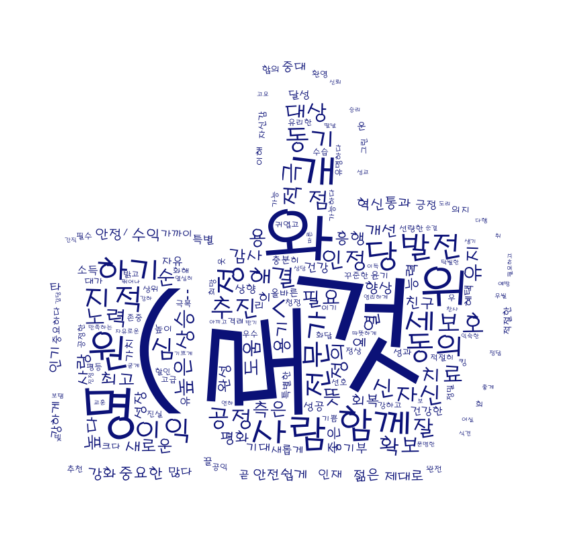

In [47]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()

### 감성사전에 긍정단어, 부정단어 추가하는 부분이라고 생각함

In [ ]:
SentiWord = pd.read_csv('SentiWord_info.csv') # csv를 불러옴
word = '알쏭'
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]  # 맨 끝에 징용 -2를 줌
SentiWord.loc[len(SentiWord)] = ['합의','합의',1] # 맨 끝에 합의 +1 을 줌
SentiWord.tail()

def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res

pos_neg('알쏭')